```
 Laboratório de Princípios de Comunicações (LPC) 
 Período 2020.1e 
 Notebook de auxílio ao guia de Experimentos 1
 Tema(s): Introdução ao GNU Radio. Séries de Fourier. Distorção.
 Professor(es): Edson P. da Silva e Luciana Veloso  
 
 As práticas experimentais propostas no experimento 1 têm por objetivos:
 
 - Introduzir ao GNU Radio Companion como ferramenta para realização de experimentos em comunicações;
 - Simular e analisar séries de Fourier de sinais comuns;
 - Caracterizar distorções de canal. 
 ```

# Notebook de auxílio ao Guia de Experimentos 1

<h1>Sumário<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Representação-de-funções-periódicas-via-séries-de-Fourier" data-toc-modified-id="Representação-de-funções-periódicas-via-séries-de-Fourier-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Representação de funções periódicas via séries de Fourier</a></span><ul class="toc-item"><li><span><a href="#Cálculo-dos-coeficientes-de-Fourier-via-integração-numérica" data-toc-modified-id="Cálculo-dos-coeficientes-de-Fourier-via-integração-numérica-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Cálculo dos coeficientes de Fourier via integração numérica</a></span></li><li><span><a href="#Aproximação-via-série-de-Fourier-para-a-onda-quadrada" data-toc-modified-id="Aproximação-via-série-de-Fourier-para-a-onda-quadrada-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Aproximação via série de Fourier para a onda quadrada</a></span></li><li><span><a href="#Aproximação-via-série-de-Fourier-para-a-onda-triangular" data-toc-modified-id="Aproximação-via-série-de-Fourier-para-a-onda-triangular-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Aproximação via série de Fourier para a onda triangular</a></span></li><li><span><a href="#Aproximação-via-série-de-Fourier-para-a-onda-dente-de-serra" data-toc-modified-id="Aproximação-via-série-de-Fourier-para-a-onda-dente-de-serra-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Aproximação via série de Fourier para a onda dente de serra</a></span></li><li><span><a href="#Reescrevendo-a-série-de-Fourier-na-sua-forma-harmônica" data-toc-modified-id="Reescrevendo-a-série-de-Fourier-na-sua-forma-harmônica-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Reescrevendo a série de Fourier na sua forma harmônica</a></span></li></ul></li><li><span><a href="#Distorção-de-sinais" data-toc-modified-id="Distorção-de-sinais-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Distorção de sinais</a></span><ul class="toc-item"><li><span><a href="#Quando-um-sistema-linear-e-invariante-no-tempo-(LIT)-não-causará-distorção?" data-toc-modified-id="Quando-um-sistema-linear-e-invariante-no-tempo-(LIT)-não-causará-distorção?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Quando um sistema linear e invariante no tempo (LIT) não causará distorção?</a></span></li><li><span><a href="#Verificação-para-o-caso-de-sinais-periódicos" data-toc-modified-id="Verificação-para-o-caso-de-sinais-periódicos-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Verificação para o caso de sinais periódicos</a></span></li></ul></li><li><span><a href="#Energia,-potência-e-largura-de-banda" data-toc-modified-id="Energia,-potência-e-largura-de-banda-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Energia, potência e largura de banda</a></span><ul class="toc-item"><li><span><a href="#Potência-e-energia" data-toc-modified-id="Potência-e-energia-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Potência e energia</a></span></li><li><span><a href="#Escala-decibel" data-toc-modified-id="Escala-decibel-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Escala decibel</a></span></li><li><span><a href="#Ocupação-de-banda" data-toc-modified-id="Ocupação-de-banda-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Ocupação de banda</a></span></li></ul></li></ul></div>

In [4]:
from IPython.core.pylabtools import figsize

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Representação de funções periódicas via séries de Fourier

Seja a função $f(t)$ periódica com período $P$, isto é $f(t)=f(t+nP)$ para $n=1,2,3,...$, e absolutamente integrável num intervalo de comprimento $P$. Considerando que a função $f(t)$ admite representação em termos de uma série trigonométrica de Fourier, $f(t)$ pode ser escrita como

$$ f(t)=\frac{a_{0}}{2}+\sum_{n=1}^{\infty}\left[a_{n} \cos \left(2\pi t\frac{n}{P}\right)+b_{n} \sin \left(2\pi t\frac{n}{P}\right)\right] $$

em que $a_n$ e $b_n$ são os coeficientes de Fourier da expansão de $f(t)$, calculados de acordo com as expressões

$$a_{n}=\frac{2}{P} \int_{P} f(t) \cos \left(2\pi t\frac{n}{P}\right) dt $$

$$b_{n}=\frac{2}{P} \int_{P} f(t) \sin \left(2\pi t\frac{n}{P}\right) dt.$$

Em particular, considerando os coeficientes associados ao nível DC do sinal, temos que

$$\begin{eqnarray}
a_{0}&=&\frac{2}{P} \int_{P} f(t) \cos(0) dt =\frac{2}{P} \int_{P} f(t) dt\\
b_{0}&=&\frac{2}{P} \int_{P} f(t) \sin(0) dt = 0.
\end{eqnarray}$$

Para revisitar o emprego das séries de Fourier na análise de sinais e sistemas, começamos gerando alguns sinais periódicos para em seguida determinar a sua composição espectral via cálculo dos coeficientes de Fourier.

In [5]:
# Carrega pacotes 

import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, sin, arctan2, sqrt, log10
from scipy.signal import square, sawtooth
import pandas as pd

pd.set_option("display.precision", 2)
figsize(10, 3)


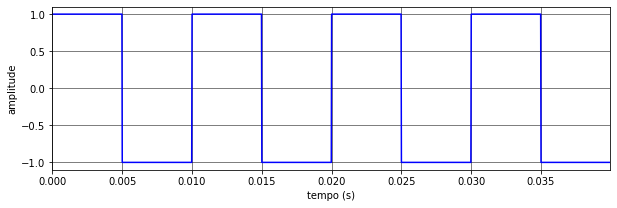

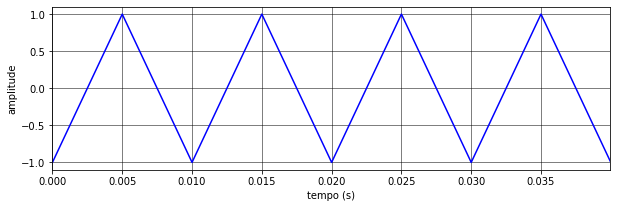

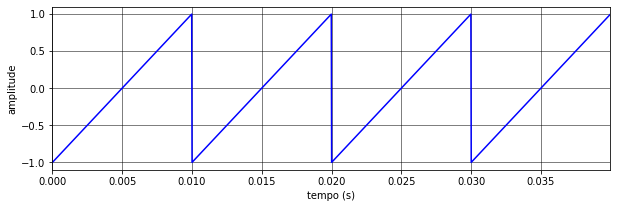

In [6]:
# Geração de sinais periódicos

f0 = 100     # Frequência fundamental
fa = 400*f0  # Frequência de amostragem

t    = np.arange(0, 40e-3, 1/fa)
π    = np.pi
A    = 1                         # amplitude
ϕ    = 0*π/4                     # fase

quad   = A*square(2*π*f0*t + ϕ)                # onda quadrada com frequência fundamental f0 e phase inicial ϕ
triang = A*sawtooth(2*π*f0*t + ϕ, width = 0.5) # onda triangular com frequência fundamental f0 e phase inicial ϕ
dente  = A*sawtooth(2*π*f0*t + ϕ)              # onda dente de serra com frequência fundamental f0 e phase inicial ϕ

plt.figure()
plt.plot(t, quad,'b')
plt.ylim(quad.min(0)-0.1, quad.max(0)+0.1)
plt.xlim(0,t.max(0))
plt.xlabel('tempo (s)')
plt.ylabel('amplitude')
plt.grid(color='k', linestyle='-', linewidth=0.5)

plt.figure()
plt.plot(t, triang,'b')
plt.ylim(triang.min(0)-0.1, triang.max(0)+0.1)
plt.xlim(0,t.max(0))
plt.xlabel('tempo (s)')
plt.ylabel('amplitude')
plt.grid(color='k', linestyle='-', linewidth=0.5)

plt.figure()
plt.plot(t, dente,'b')
plt.ylim(dente.min(0)-0.1, dente.max(0)+0.1)
plt.xlim(0,t.max(0))
plt.xlabel('tempo (s)')
plt.ylabel('amplitude')
plt.grid(color='k', linestyle='-', linewidth=0.5)

### Cálculo dos coeficientes de Fourier via integração numérica

Primeiramente, vamos definir uma função simples para calcular numericamente os coeficientes $a_n$ e $b_n$ da série de Fourier para uma função periódica $f(t)$ qualquer (veja um resumo sobre o método de integração `numpy.trapz` em https://numpy.org/doc/stable/reference/generated/numpy.trapz.html).

In [7]:
def fourierCoeff(t,f,P,n):
    """
     t  : vetor de instantes de tempo contendo pelo menos um período completo da função [segundos]
     f  : vetor de valores de f(t) calculados para cada instante em t 
     P  : período fundamental de f [segundos]
     n  : ordem do coeficiente de Fourier desejado [número inteiro maior ou igual a zero]
     an : coeficiente an
     bn : coeficiente bn
     
    """
    
    dt = t[1]-t[0]          # período de amostragem [passo de integração]
    N  = int(np.ceil(P/dt)) # número de amostras correspondente a um período completo da onda   
    an = 0
    bn = 0  
    
    # integração numérica dos coeficientes an e bn utilizando o método 
    # trapezoidal
    an = np.trapz(f[0:N]*cos(2*np.pi*t[0:N]*n/P), dx=dt)
    bn = np.trapz(f[0:N]*sin(2*np.pi*t[0:N]*n/P), dx=dt)         
    
    an = an*2/P
    bn = bn*2/P
    
    return an, bn

Agora que a função ``an, bn = fourierCoeff(t,f,P,n)`` foi definida, podemos utilizá-la para calcular os coeficientes de Fourier de sinais periódicos quaisquer. No que segue, aplica-se ``fourierCoeff`` para calcular os coeficientes de fourier das formas de onda geradas anteriormente.

### Aproximação via série de Fourier para a onda quadrada

,an,bn
0,0.00,0.00
1,0.01,1.27
2,-0.00,-0.00
3,0.01,0.42
4,-0.00,-0.00
5,0.01,0.25
6,-0.00,-0.00
7,0.01,0.18
8,-0.00,-0.00
9,0.01,0.14


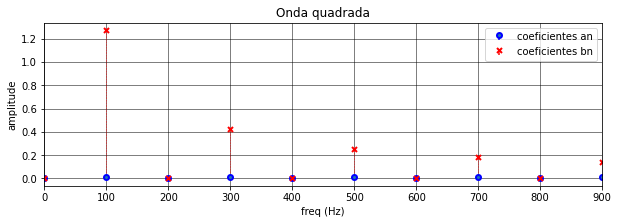

In [8]:
# Coeficientes de Fourier da onda quadrada

ncoeffs = 10  # número de componentes harmônicos (incluindo componente dc, n=0)

# alocação de variáveis
quad_an = np.zeros((ncoeffs, 1)); # coeficientes an
quad_bn = np.zeros((ncoeffs, 1)); # coeficientes bn
xf      = np.zeros((ncoeffs, 1)); # frequências associadas a an, bn [Hz]

# calcula coeficientes de Fourier para n=0 até n=ncoeffs-1
for n in range(0,ncoeffs): 
    quad_an[n], quad_bn[n] = fourierCoeff(t, quad , 1/f0, n)
    xf[n] = n*f0

# Plota gráficos
plt.figure()
(markers, stemlines, baseline) = plt.stem(xf, quad_an,'b',\
                                          use_line_collection=True,\
                                          label = 'coeficientes an')
plt.setp(baseline, visible=False)
plt.setp(markers, marker='o', markersize=5, markeredgecolor="b", markeredgewidth=2)
plt.setp(stemlines, linestyle="--", color="b", linewidth=0.5 )

(markers, stemlines, baseline) = plt.stem(xf, quad_bn,'r',\
                                          use_line_collection=True,\
                                          label = 'coeficientes bn')
plt.setp(baseline, visible=False)
plt.setp(markers, marker='x', markersize=5, markeredgecolor="r", markeredgewidth=2)
plt.setp(stemlines, linestyle="--", color="r", linewidth=0.5 )

plt.title('Onda quadrada')
plt.legend()
plt.xlim(0,xf.max(0))
#plt.ylim(-2,2)
plt.xlabel('freq (Hz)')
plt.ylabel('amplitude')
plt.grid(color='k', linestyle='-', linewidth=0.5)

# Gera tabela com os coeficientes an, bn
pd.options.display.float_format = '{:,.2f}'.format
pd.DataFrame(np.hstack((quad_an, quad_bn)), columns=["an", "bn"])

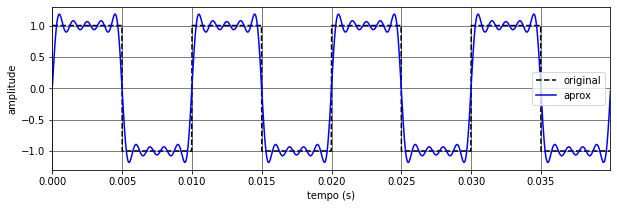

In [9]:
# Aproximação da onda quadrada via somatório de harmônicas da série de Fourier

ncoeffs = 10 # número de componentes harmônicos (incluindo componente dc, n=0)

# calcula aproximação do sinal com um somatório finito de harmônicos
quad_aprox = 0
for n in range(0,ncoeffs):
    if n != 0:
        quad_aprox = quad_aprox + quad_an[n]*cos(2*π*n*f0*t)\
                                + quad_bn[n]*sin(2*π*n*f0*t) # soma n-ésimo componente harmônico
    else:
        quad_aprox = quad_an[n]/2

plt.plot(t, quad,'k--',label = 'original')        
plt.plot(t,quad_aprox,'b',label = 'aprox')
plt.xlim(0,t.max(0))
plt.xlabel('tempo (s)')
plt.ylabel('amplitude')
plt.legend()
plt.grid(color='k', linestyle='-', linewidth=0.5)

### Aproximação via série de Fourier para a onda triangular

,an,bn
0,0.00,0.00
1,-0.81,-0.00
2,0.00,-0.00
3,-0.09,-0.00
4,0.00,-0.00
5,-0.03,-0.00
6,0.00,-0.00
7,-0.01,-0.00
8,0.00,-0.00
9,-0.01,-0.00


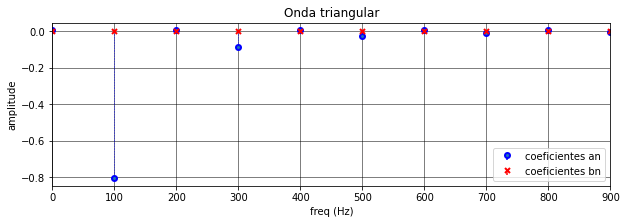

In [10]:
# Coeficientes de Fourier da onda triangular

ncoeffs = 10 # número de componentes harmônicos (incluindo componente dc, n=0)

# alocação de variáveis
triang_an = np.zeros((ncoeffs, 1));
triang_bn = np.zeros((ncoeffs, 1));
xf        = np.zeros((ncoeffs, 1));

# calcula coeficientes de Fourier para n=0 até n=ncoeffs-1
for n in range(0,ncoeffs): 
    triang_an[n], triang_bn[n] = fourierCoeff(t, triang , 1/f0, n)
    xf[n] = n*f0
    
plt.figure()
(markers, stemlines, baseline) = plt.stem(xf, triang_an,'b',\
                                          use_line_collection=True,\
                                          label = 'coeficientes an')
plt.setp(baseline, visible=False)
plt.setp(markers, marker='o', markersize=5, markeredgecolor="b", markeredgewidth=2)
plt.setp(stemlines, linestyle="--", color="b", linewidth=0.5 )

(markers, stemlines, baseline) = plt.stem(xf, triang_bn,'r',\
                                          use_line_collection=True,\
                                          label = 'coeficientes bn')
plt.setp(baseline, visible=False)
plt.setp(markers, marker='x', markersize=5, markeredgecolor="r", markeredgewidth=2)
plt.setp(stemlines, linestyle="--", color="r", linewidth=0.5 )

plt.title('Onda triangular')
plt.legend()
plt.xlim(0,xf.max(0))
#plt.ylim(-2,2)
plt.xlabel('freq (Hz)')
plt.ylabel('amplitude')
plt.grid(color='k', linestyle='-', linewidth=0.5)

# Gera tabela com os coeficientes an, bn
pd.options.display.float_format = '{:,.2f}'.format
pd.DataFrame(np.hstack((triang_an, triang_bn)), columns=["an", "bn"])

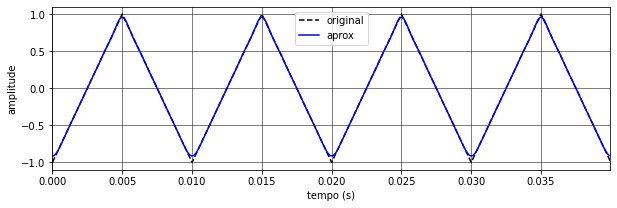

In [11]:
# Aproximação da onda triangular via somatório de harmônicas da série de Fourier

ncoeffs = 10 # número de componentes harmônicos (incluindo componente dc, n=0)

# calcula aproximação do sinal com um somatório finito de harmônicos
triang_aprox = 0
for n in range(0,ncoeffs):
    if n != 0:
        triang_aprox = triang_aprox + triang_an[n]*cos(2*π*n*f0*t)\
                                    + triang_bn[n]*sin(2*π*n*f0*t) # soma n-ésimo componente harmônico
    else:
        triang_aprox = triang_an[n]/2

plt.plot(t, triang,'k--',label = 'original')        
plt.plot(t,triang_aprox,'b',label = 'aprox')
plt.xlim(0,t.max(0))
plt.xlabel('tempo (s)')
plt.ylabel('amplitude')
plt.legend()
plt.grid(color='k', linestyle='-', linewidth=0.5)


### Aproximação via série de Fourier para a onda dente de serra

,an,bn
0,-0.00,0.00
1,-0.00,-0.64
2,-0.00,-0.32
3,-0.00,-0.21
4,-0.00,-0.16
5,-0.00,-0.13
6,-0.00,-0.11
7,-0.00,-0.09
8,-0.00,-0.08
9,-0.00,-0.07


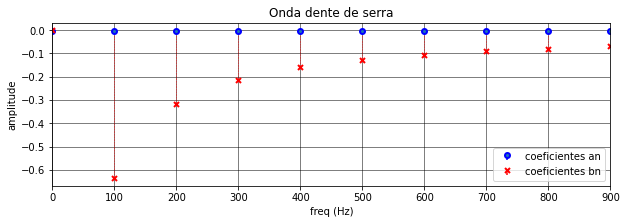

In [12]:
# Coeficientes de Fourier da onda dente de serra

ncoeffs = 10 # número de componentes harmônicos (incluindo componente dc, n=0)

# alocação de variáveis
dente_an = np.zeros((ncoeffs, 1));
dente_bn = np.zeros((ncoeffs, 1));
xf       = np.zeros((ncoeffs, 1));

# calcula coeficientes de Fourier para n=0 até n=ncoeffs-1
for n in range(0,ncoeffs): 
    dente_an[n], dente_bn[n] = fourierCoeff(t, dente, 1/f0, n)
    xf[n] = n*f0

#plota gráficos
plt.figure()
(markers, stemlines, baseline) = plt.stem(xf, dente_an,'b',\
                                          use_line_collection=True,\
                                          label = 'coeficientes an')
plt.setp(baseline, visible=False)
plt.setp(markers, marker='o', markersize=5, markeredgecolor="b", markeredgewidth=2)
plt.setp(stemlines, linestyle="--", color="b", linewidth=0.5 )

(markers, stemlines, baseline) = plt.stem(xf, dente_bn,'r',\
                                          use_line_collection=True,\
                                          label = 'coeficientes bn')
plt.setp(baseline, visible=False)
plt.setp(markers, marker='x', markersize=5, markeredgecolor="r", markeredgewidth=2)
plt.setp(stemlines, linestyle="--", color="r", linewidth=0.5 )

plt.title('Onda dente de serra')
plt.legend()
plt.xlim(0,xf.max(0))
plt.xlabel('freq (Hz)')
plt.ylabel('amplitude')
plt.grid(color='k', linestyle='-', linewidth=0.5)

# Gera tabela com os coeficientes an, bn
pd.options.display.float_format = '{:,.2f}'.format
pd.DataFrame(np.hstack((dente_an, dente_bn)), columns=["an", "bn"])

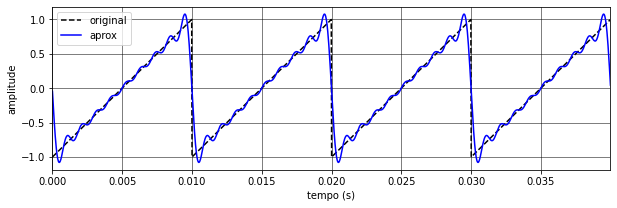

In [13]:
# Aproximação da onda dente de serra via somatório de harmônicas da série de Fourier

ncoeffs = 10 # número de componentes harmônicos (incluindo componente dc, n=0)

# calcula aproximação do sinal com um somatório finito de harmônicos
dente_aprox = 0
for n in range(0,ncoeffs):
    if n != 0:
        dente_aprox = dente_aprox + dente_an[n]*cos(2*π*n*f0*t)\
                                  + dente_bn[n]*sin(2*π*n*f0*t) # soma n-ésimo componente harmônico
    else:
        dente_aprox = dente_an[n]/2

plt.plot(t, dente,'k--',label = 'original')        
plt.plot(t, dente_aprox,'b',label = 'aprox')
plt.xlim(0,t.max(0))
plt.xlabel('tempo (s)')
plt.ylabel('amplitude')
plt.legend()
plt.grid(color='k', linestyle='-', linewidth=0.5)

### Reescrevendo a série de Fourier na sua forma harmônica

Podemos expressar a série de Fourier de maneira simplificada utilizando a sua forma harmônica, utilizando apenas a função cosseno para representar os componentes harmônicos da função.

$$f(t)=A_{0} + \sum_{n=1}^{\infty} A_{n}\cos \left(2\pi t \frac{n}{P}-\theta_{n}\right)$$

em que 

$$A_{0}=\frac{a_{0}}{2},\; A_{n}=\sqrt{a_{n}^{2}+b_{n}^{2}} \; \text { para } n \geq 1, \; \theta_{n}=\arctan \left(\frac{b_{n}}{a_{n}}\right)$$

Esta representação é útil porque nos permite determinar diretamente a energia associada a cada componente de frequência do sinal através dos coeficientes $A_{n}$, como veremos a seguir.

,an,bn,An,θn [rad]
0,0.00,0.00,0.00,0.00
1,0.01,1.27,1.27,1.56
2,-0.00,-0.00,0.00,-1.59
3,0.01,0.42,0.42,1.55
4,-0.00,-0.00,0.00,-1.60
5,0.01,0.25,0.25,1.53
6,-0.00,-0.00,0.00,-1.62
7,0.01,0.18,0.18,1.52
8,-0.00,-0.00,0.00,-1.63
9,0.01,0.14,0.14,1.50


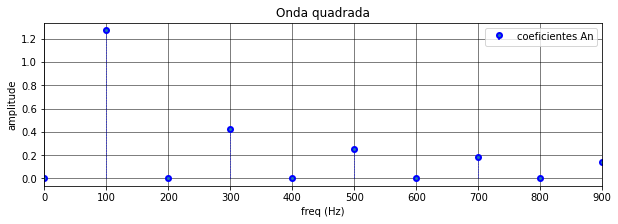

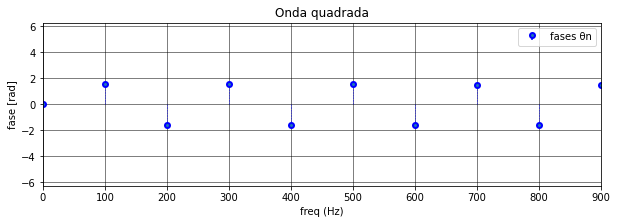

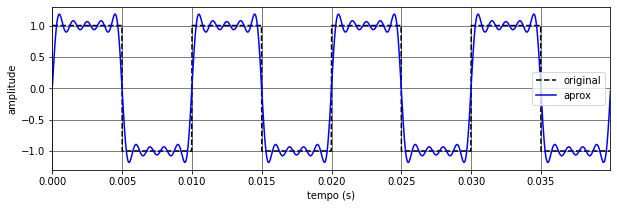

In [14]:
# Aproximação da onda quadrada via somatório de harmônicas da série de Fourier

ncoeffs = 10 # número de componentes harmônicos (incluindo componente dc, n=0)

# alocação de variáveis
quad_an = np.zeros((ncoeffs, 1))
quad_bn = np.zeros((ncoeffs, 1))
xf      = np.zeros((ncoeffs, 1))
An      = np.zeros((ncoeffs, 1))
θn      = np.zeros((ncoeffs, 1))

#calcula coeficientes (an,bn) para n=0 até n=ncoeffs-1
for n in range(0,ncoeffs): 
    quad_an[n], quad_bn[n] = fourierCoeff(t, quad , 1/f0, n)
    xf[n] = n*f0
        
# calcula coeficientes An e fases Θn da forma harmônica da série de Fourier a partir dos pares (an,bn).
for n in range(0,ncoeffs): 
    if n != 0:
        An[n] = sqrt(quad_an[n]**2 + quad_bn[n]**2)
        θn[n] = arctan2(quad_bn[n], quad_an[n])      # calcula arctan(bn/an)                    
    else:
        An[n] = quad_an[n]/2        

# plota gráficos
plt.figure()
(markers, stemlines, baseline) = plt.stem(xf, An,'b',\
                                          use_line_collection=True,\
                                          label = 'coeficientes An')
plt.setp(baseline, visible=False)
plt.setp(markers, marker='o', markersize=5, markeredgecolor="b", markeredgewidth=2)
plt.setp(stemlines, linestyle="--", color="b", linewidth=0.5 )

plt.title('Onda quadrada')
plt.legend()
plt.xlim(0,xf.max(0))
#plt.ylim(An.min(0)-0.5,An.max(0)+0.5)
plt.xlabel('freq (Hz)')
plt.ylabel('amplitude')
plt.grid(color='k', linestyle='-', linewidth=0.5)       

plt.figure()
(markers, stemlines, baseline) = plt.stem(xf, θn,'b',\
                                          use_line_collection=True,\
                                          label = 'fases θn')
plt.setp(baseline, visible=False)
plt.setp(markers, marker='o', markersize=5, markeredgecolor="b", markeredgewidth=2)
plt.setp(stemlines, linestyle="--", color="b", linewidth=0.5 )

plt.title('Onda quadrada')
plt.legend()
plt.xlim(0,xf.max(0))
plt.ylim(-2*π ,2*π)
plt.xlabel('freq (Hz)')
plt.ylabel('fase [rad]')
plt.grid(color='k', linestyle='-', linewidth=0.5)

# calcula aproximação do sinal com um somatório finito de harmônicos
quad_aprox = 0
for n in range(0,ncoeffs):
    if n != 0:
        quad_aprox = quad_aprox + An[n]*cos(2*π*n*f0*t - θn[n]) # soma n-ésimo componente harmônico
                                 
    else:
        quad_aprox = An[n]        
        
plt.figure()
plt.plot(t, quad,'k--',label = 'original')        
plt.plot(t,quad_aprox,'b',label = 'aprox')
plt.xlim(0,t.max(0))
plt.xlabel('tempo (s)')
plt.ylabel('amplitude')
plt.legend()
plt.grid(color='k', linestyle='-', linewidth=0.5)

# Gera tabela com os coeficientes an, bn, An e θn
pd.options.display.float_format = '{:,.2f}'.format
pd.DataFrame(np.hstack((quad_an, quad_bn, An, θn)), columns=["an", "bn", "An", "θn [rad]"])

## Distorção de sinais

O conceito de *distorção* aparece no contexto das disciplinas relacionadas à engenharia elétrica, particulamente nas áreas de processamento de sinais e comunicações. Em sistemas de comunicação, sinais são projetados para carregar informação. Uma vez que esses sinais estão sujeitos a diversos tipos de distorção durante o percurso entre transmissor e receptor, a informação transmitida pode ser comprometida devido à modificações diversas que distorções podem causar na forma do sinal. Portanto, o desempenho de um dado sistema dependerá da sua tolerância a esses efeitos distorcivos.

Diz-se que um sinal sofreu distorção **quando a sua forma original foi modificada, excetuando-se os casos em que tal modificação corresponde apenas a uma mudança de escala de amplitude, ou a um atraso no tempo**, que obviamente não alteram a forma de nenhum sinal. 

**Exemplo 1:** $y(t) = 2x(t-25T_a)$, em que $T_a=\frac{1}{f_a}$ é o período de amostragem. A forma de onda de $x(t)$ não é distorcida.

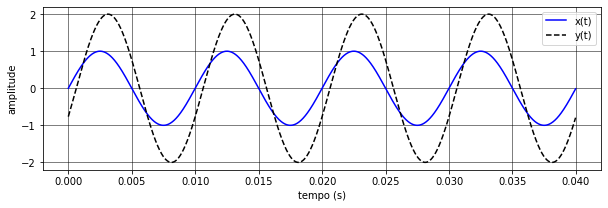

In [15]:
# Exemplo 1: y(t) não é uma versão distorcida de x(t)

x = sin(2*π*f0*t)
y = np.roll(2*x, 25)

plt.figure()
plt.plot(t,x,'b',label = 'x(t)');
plt.plot(t,y,'k--',label = 'y(t)');
plt.xlabel('tempo (s)')
plt.ylabel('amplitude')
plt.legend()
plt.grid(color='k', linestyle='-', linewidth=0.5)

**Exemplo 2:** $y(t) = x(t)+0.25x(t-25T_a)$, em que $T_a=\frac{1}{f_a}$ é o período de amostragem. A forma de onda de $y(t)$ é uma versão distorcida de $x(t)$.

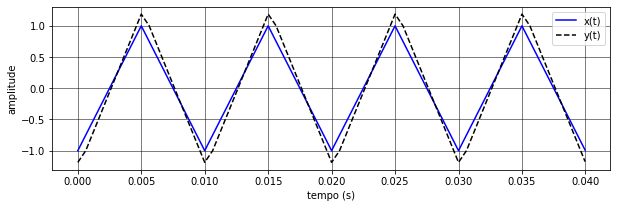

In [16]:
# Exemplo 3:  y(t) é a saída de um sistema LIT com x(t) aplicado na entrada.
#             y(t) é uma versão distorcida de x(t) (distorção linear)

x = triang
y = x  + 0.25*np.roll(x, 25)

plt.figure()
plt.plot(t,x,'b',label = 'x(t)');
plt.plot(t,y,'k--',label = 'y(t)');
plt.xlabel('tempo (s)')
plt.ylabel('amplitude')
plt.legend()
plt.grid(color='k', linestyle='-', linewidth=0.5)

**Exemplo 3:** $y(t) = [x(t)]^5$. A forma de onda de $y(t)$ é uma versão distorcida de $x(t)$.

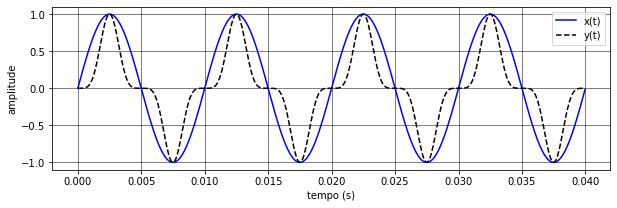

In [17]:
# Exemplo 3:  y(t) é uma função não-linear de x(t)
#             y(t) é uma versão distorcida de x(t) (distorção não-linear)

x = sin(2*π*f0*t)
y = x**5

plt.figure()
plt.plot(t,x,'b',label = 'x(t)');
plt.plot(t,y,'k--',label = 'y(t)');
plt.xlabel('tempo (s)')
plt.ylabel('amplitude')
plt.legend()
plt.grid(color='k', linestyle='-', linewidth=0.5)

Distorções podem ser classificadas em dois tipos básicos:

- **Distorções lineares**: causadas por operações lineares sofridas pelo sinal. Quando analisadas no domínio da frequência, distorções lineares podem ser classificadas em

    - *Distorções de amplitude*: ocorrem devido a alterações na amplitude dos componentes de frequência do sinal (i.e. diferentes componentes de frequência sofrem alterações de amplitudes distintas). Exemplo: ao passar um sinal por um filtro passa-baixas, componentes de alta frequência serão atenuados causando uma distorção de amplitude do sinal na saída com relação ao sinal na entrada do filtro (suavização do sinal na saída do filtro).
    - *Distorções de fase*: ocorrem devido a alterações na fase dos componentes de frequência do sinal (i.e. diferentes componentes de frequência sofrem alterações de fase distintas).

- **Distorções não-lineares**: causadas por operações não-lineares sofridas pelo sinal. Uma característica que distingue distorções não-lineares das distorções lineares é que as primeiras são as únicas capazes de gerar novos componentes de frequência no sinal distorcido em comparação ao sinal original. Portanto, o surgimento de novos componentes harmônicos no sinal distorcido é um indicativo de que trata-se de uma distorção não-linear. Veja o exempo a seguir, em que o terceiro e o quinto harmônico aparecem no sinal distorcido:

In [18]:
# Aplicando uma função não-linear ao sinal e observando o que ocorre com os coeficientes dos harmônicos

ncoeffs = 6 # número de componentes harmônicos (incluindo componente dc, n=0)

x = sin(2*π*f0*t)
y = x**5

# alocação de variáveis
x_an = np.zeros((ncoeffs, 1))
x_bn = np.zeros((ncoeffs, 1))

y_an = np.zeros((ncoeffs, 1))
y_bn = np.zeros((ncoeffs, 1))


#calcula coeficientes (an,bn) para n=0 até n=ncoeffs-1
for n in range(0,ncoeffs): 
    x_an[n], x_bn[n] = fourierCoeff(t, x , 1/f0, n)
    y_an[n], y_bn[n] = fourierCoeff(t, y , 1/f0, n)
 
   
# Gera tabela com os coeficientes an, bn dos sinais x e y
pd.options.display.float_format = '{:,.2f}'.format
pd.DataFrame(np.hstack((x_an, x_bn, y_an, y_bn)), columns=["x_an", "x_bn", "y_an", "y_bn"])

,x_an,x_bn,y_an,y_bn
0,0.00,0.00,0.00,0.00
1,0.00,1.00,0.00,0.62
2,0.00,-0.00,0.00,-0.00
3,0.00,-0.00,0.00,-0.31
4,0.00,-0.00,0.00,-0.00
5,0.00,-0.00,0.00,0.06


### Quando um sistema linear e invariante no tempo (LIT) não causará distorção?

As duas operações lineares que não distorcem um sinal estão resumidas em

$$\begin{equation}
y(t)=Gx(t-\tau).
\label{eq1} \tag{1}
\end{equation}$$

Logo, $y(t)$ conserva a mesma forma do sinal $x(t)$. Podemos considerar $y(t)$ em $\eqref{eq1}$ como sendo a saída de um sistema LIT, cuja resposta ao impulso é $h(t)=G\delta(t-\tau)$, ao aplicar-se o sinal $x(t)$ na sua entrada. Analisando $\eqref{eq1}$ no domínio da frequência, temos

$$\begin{align}
Y(f)&=Ge^{-j2\pi f \tau}X(f)\\ \\
Y(f)&=H(f)X(f), \text { com } H(f) = Ge^{-j2\pi f \tau}.
\label{eq2} \tag{2}\\
\end{align}$$

Note que a resposta em amplitude de $H(f)$ é constante $|H(f)|=G$ para todo $f$ (ou seja, trata-se de um filtro passa-tudo) e a resposta em fase $\angle H(f)=-2\pi f \tau$ é uma função linear de $f$. Portanto, como $H(f)$ representa **o único sistema LIT que não distorcerá o sinal de entrada**, se um sistema LIT qualquer não possuir resposta em frequência na forma expressa na $\eqref{eq2}$, naturalmente $y(t)$ será uma versão distorcida de $x(t)$.

Na prática, $x(t)$ não possui largura de banda infinita. Logo, para que $y(t)$ não seja uma versão distorcida de $x(t)$ é necessário apenas que as condições $|H(f)|=G$ e $\angle H(f)=-2\pi f \tau$  sejam satisfeitas dentro do intervalo de frequências em que $x(t)$ está contido.


### Verificação para o caso de sinais periódicos

Assuma que o sinal $x(t)$ é periódico e admite representação em termos de uma série de Fourier, então

$$x(t)=A_{0} + \sum_{n=1}^{\infty} A_{n}\cos \left(2\pi n f_0 t-\theta_{n}\right) \label{eq3} \tag{3}$$

em que $f_0 = 1/P$. Logo, considerando a relação entre $x(t)$ e $y(t)$ dada pela $\eqref{eq1}$ temos

$$\begin{align}
y(t)&=GA_{0} + \sum_{n=1}^{\infty} GA_{n}\cos \left[2\pi n f_0 (t-\tau) -\theta_{n}\right]\\
y(t)&=GA_{0} + \sum_{n=1}^{\infty} GA_{n}\cos \left[2\pi n f_0 t -2\pi n f_0 \tau  -\theta_{n}\right]\\
y(t)&=GA_{0} + \sum_{n=1}^{\infty} GA_{n}\cos \left[2\pi n f_0 t -\theta_{n} + \Delta \theta\right] \label{eq4} \tag{4}
\end{align}$$

Desse modo, ao compararmos amplitude e fase dos componentes harmônicos em $\eqref{eq3}$ e $\eqref{eq4}$, conclui-se que para que $y(t)=h(t)\ast x(t)$ não seja uma versão distorcida de $x(t)$, todos os componentes de frequência de $x(t)$ devem sofrer o mesmo ganho $G$ (ou atenuação, se $|G|<1$) e o desvio de fase $\Delta \theta$ gerado pelo atraso $\tau$ deve ser linear com relação à frequência $\Delta \theta = (-2\pi f_0 \tau)n$, ou seja, o desvio de fase do $n$-ésimo componente harmônico tem que ser $n$ vezes o desvio de fase do componente fundamental, o que está de acordo com $\eqref{eq2}$ 

## Energia, potência e largura de banda


Três grandezas importantes para a caracterizarização de sinais são: energia, potência e largura de banda. Para que possamos entender a relação entre essas grandezas e como podemos determiná-las para um dado sinal, vamos revisitar suas definições formais e aplicar esses conceitos aos sinais que estamos analisando.

### Potência e energia

Na tabela a seguir tem-se um resumo das expressões matemáticas definindo energia e potência para sinais definidos no tempo contínuo e no tempo discreto:

$$
\begin{array}{|l|l|l|}\hline
\text { Propriedade } & \text { Tempo contínuo } & \text { Tempo discreto } \\
\hline \text { Energia } & E_{x}=\int_{-\infty}^{\infty}|x(t)|^{2} dt <\infty & E_{x}=\sum_{n=-\infty}^{\infty}|x[n]|^{2}<\infty \\
\hline \text { Potência } & P_{x}=\lim _{T \rightarrow \infty} \frac{1}{2 T} \int_{-T}^{T}|x(t)|^{2} dt<\infty & P_{x}=\lim _{N \rightarrow \infty} \frac{1}{2 N+1} \sum_{n=-N}^{N}|x[n]|^{2}<\infty\\\hline
\end{array}
$$

Perceba que se o sinal tiver duração infinita ($-\infty<t<\infty$ ou $-\infty<n<\infty$) as expressões podem divergir, de forma que para alguns tipos de sinais estas grandezas não serão bem definidas. Um exemplo simples é o caso de uma onda senoidal de duração infinita $s(t)=A\sin(2\pi ft + \theta)$, o qual possui energia infinita $E_s = \infty$ e potência finita $P_s = A^2/2$.

Os sinais que geramos numa simulação numérica são sempre discretos e de duração finita e, portanto, para esses sinais os somatórios que definem energia e potência são sempre finitos. Vamos calcular a potência e a energia da onda quadrada de acordo com as expressões utilizadas para sinais no tempo discreto:

In [19]:
# Cálculo da energia
E_quad = np.sum(abs(quad)**2)

# Cálculo da potência
N = len(quad)
P_quad = np.sum(abs(quad)**2)/N

print('Energia  = %3.2f unidades de energia' %(E_quad))
print('Potência = %3.2f unidades de potência' %(P_quad))

Energia  = 1600.00 unidades de energia
Potência = 1.00 unidades de potência


Agora vamos calcular a potência da aproximação da onda quadrada obtida via série de Fourier:

In [20]:
# Cálculo da energia
E_quad_aprox = np.sum(abs(quad_aprox)**2)

# Cálculo da potência
N = len(quad)
P_quad_aprox = np.sum(abs(quad_aprox)**2)/N

# Cálculo da potência pela soma da potência individual de cada componente harmônico 
P_harm = np.sum(abs(An)**2)/2

print('Energia  = %3.2f unidades de energia' %(E_quad_aprox))
print('Potência = %3.2f unidades de potência' %(P_quad_aprox))
print('Soma das potências dos componentes harmônicos da série: %2.2f unidades de potência' %(P_harm))

Energia  = 1535.10 unidades de energia
Potência = 0.96 unidades de potência
Soma das potências dos componentes harmônicos da série: 0.96 unidades de potência


Perceba que os valores tanto de energia quanto de potência do sinal original e do sinal aproximado pela série de Fourier estão muito próximos, como esperado.

Podemos visualizar como a potência do sinal se distribui no domínio da frequência plotando o gráfico da potência de cada componente harmônico em função da frequência.

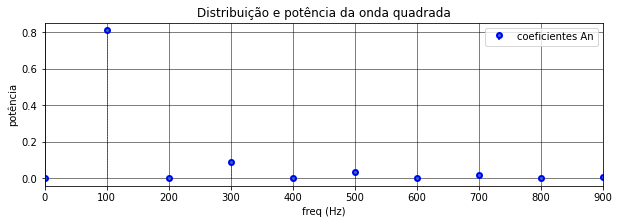

In [21]:
# plota gráficos
plt.figure()
(markers, stemlines, baseline) = plt.stem(xf, (abs(An)**2)/2,'b',\
                                          use_line_collection=True,\
                                          label = 'coeficientes An')
plt.setp(baseline, visible=False)
plt.setp(markers, marker='o', markersize=5, markeredgecolor="b", markeredgewidth=2)
plt.setp(stemlines, linestyle="--", color="b", linewidth=0.5 )

plt.title('Distribuição e potência da onda quadrada')
plt.legend()
plt.xlim(0,xf.max(0))
#plt.ylim(-0.1,1)
plt.xlabel('freq (Hz)')
plt.ylabel('potência')
plt.grid(color='k', linestyle='-', linewidth=0.5)       

### Escala decibel

Uma forma convencional de apresentar gráficos de potência consiste em utilizar a escala de decibel (dB) no eixo y. Uma medida em dB é sempre um valor comparativo entre uma grandeza qualquer e uma grandeza de referência. Tal comparação é dada pela expressão a seguir:

$$ P_{\text{dBx}} = 10\log_{10}\left[\frac{P}{P_{x}}\right]$$

ou, equivalentemente

$$ P = P_{x}10^{\left(P_{\text{dBx}}/10\right)}.$$

Na prática, o procedimento mais comum é comparar os valores de potência de um dado sinal com um valor de referência, geralmente 1 mW ou 1 W, que geram as medidas em dBm e dBW, respectivamente:

$$ P_{\text{dBm}} = 10\log_{10}\left[\frac{P}{\text{1 mW}}\right]$$
$$ P_{\text{dBW}} = 10\log_{10}\left[\frac{P}{\text{1 W}}\right]$$

Por exemplo, se um sinal possui 3 dBm de potência, significa que este possui duas vezes a potência do sinal de referência, que nesse caso é 1 mW, ou seja, possui 2 mW. Uma potência de -3 dBm correponde a 0.5 mW, etc. Note que, se $P$ já possuir a mesma unidade da grandeza de referência, o argumento do logaritmo é apenas uma divisão por 1 e as expressões podem ser simplificadas para 

$$\begin{align} P_{\text{dBm}} &= 10\log_{10}(P)\text{, com $P$ em mW,}\\ 
                P_{\text{dBW}} &= 10\log_{10}(P)\text{, com $P$ em W.}
                \end{align}$$

A tabela a seguir mostra a relação entra alguns fatores multiplicativos com relação à grandeza de referência na escala linear e a correspondente variação na escala em dB.

$$
\begin{array}{|l|c|l|c|}
\hline\text {Fator de multiplicação } & \text {Variação em dB}& \text {Fator de multiplicação } & \text {Variação em dB} \\\hline
1000000000 & +90 & 0.000000001 & -90 \\
100000000 & +80 & 0.00000001 & -80 \\
10000000 & +70 & 0.0000001 & -70 \\
1000000 & +60 & 0.000001 & -60 \\
100000 & +50 & 0.00001 & -50 \\
10000 & +40 & 0.0001 & -40 \\
1000 & +30 & 0.001 & -30 \\
100 & +20 & 0.01 & -20 \\
10 & +10 & 0.1 & -10 \\
4 & +6 & 0.25 & -6 \\
2 & +3 & 0.5 & -3 \\ 
1 & 0 & &\\\hline
\end{array}
$$

Uma vez que a potência é proporcional ao quadrado da amplitude do sinal $P\propto |s(t)|^2$, a variação de potência em dB pode também ser expressa em termos da amplitude do sinal

$$ P_{\text{dBx}} = 10\log_{10}\left[\frac{P}{P_{x}}\right] = 10\log_{10}\left[\frac{|s(t)|^2}{P_{x}}\right] = 20\log_{10}\left[\frac{|s(t)|}{\sqrt{P_{x}}}\right],$$

ou seja,

$$ P_{\text{dBx}} = 20\log_{10}\left[\frac{|s(t)|}{\sqrt{P_{x}}}\right] \text{    ou, no caso de $P_x =1$,   } P_{\text{dBx}} = 20\log_{10}|s(t)|$$

Vamos plotar novamente a potência de cada componente harmônico da onda quadrada em função da frequência, mas agora utilizando a escala em dB.

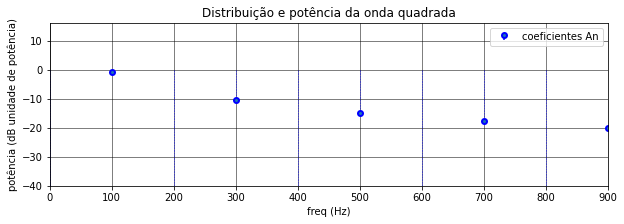

In [22]:
# plota gráficos
plt.figure()
(markers, stemlines, baseline) = plt.stem(xf, 10*log10((abs(An)**2)/2),'b',\
                                          use_line_collection=True,\
                                          label = 'coeficientes An')
plt.setp(baseline, visible=False)
plt.setp(markers, marker='o', markersize=5, markeredgecolor="b", markeredgewidth=2)
plt.setp(stemlines, linestyle="--", color="b", linewidth=0.5 )

plt.title('Distribuição e potência da onda quadrada')
plt.legend()
plt.xlim(0,xf.max(0))
plt.ylim(-40,)
plt.xlabel('freq (Hz)')
plt.ylabel('potência (dB unidade de potência)')
plt.grid(color='k', linestyle='-', linewidth=0.5)

Observando o gráfico acima, vemos que a potência do componente fundamental está próxima a 0 dB, ou seja, indicando que o seu valor de potência é próximo ao valor unitário na unidade de potência considerada (i.e. $10\log_{10}(1)=0~dB$). O quinto harmônico, por sua vez, possui potência -20 dB, indicando que seu valor de potência é um centésimo da unidade considerada (i.e. $10\log_{10}(1/100)=-20~dB$). Veja que esta informação sobre os níveis relativos de potência entre componentes de frequência não é clara quando observamos o gráfico na escala linear. 

### Ocupação de banda

O intervalo de frequências que um dado sinal ocupa é um parâmetro de muita importância em engenharia de comunicações, uma vez que a grande maioria dos sistemas de comunicações dispõe de um espectro de frequências limitado para transmissão e recepção de informação. Nesse contexto, é necessário definir métricas para quantificar a largura de banda (ou ocupação de banda) de sinais. 

A largura de banda de um sinal é uma medida associada ao intervalo de frequências em que a potência/energia do sinal está concentrada. Nesse aspecto, considerando sinais passa-baixas e passa-faixas, o conceito mais difundido é o conceito da largura de banda de 3 dB. Nesse caso, a largura de banda constitui o intervalo entre a frequência central de um sinal, que possui o maior nível de potência, até a frequência cuja potência está exatamente 3 dB abaixo da potência do componente central. Partindo do mesmo princípio, podemos definir banda de 6 dB, banda de 10 dB, banda de 20 dB, etc.  Essa metodologia para definir a banda de sinais, entretanto, é difícil de ser generalizada. Isto porque **diversas formas de espectro em que a frequência central não é a mais energética** podem aparecer em sistemas de comunicações.

Uma forma mais geral de definir o conceito de banda é determinar o intervalo de frequências em que a maior parte da potência do sinal (> 90%) está contida. No gráfico abaixo, a composição percentual da potência de cada componente harmônico da série de Fourier da onda quadrada está ilustrada. Veja que mais de 90% da potência está contida nos dois primeiros harmônicos. Desse modo, podemos afirmar que a banda contendo $\approx$ 90% da energia desse sinal é 300 Hz.


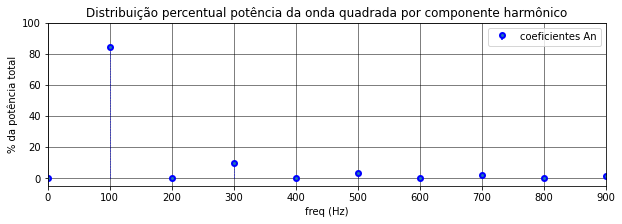

In [23]:
# plota gráficos

Ptot  = np.sum((abs(An)**2)/2) # potência total
Pharm = (abs(An)**2)/2         # vetor com a potência individual por harmônico

plt.figure()
(markers, stemlines, baseline) = plt.stem(xf, (Pharm/Ptot)*100,'b',\
                                          use_line_collection=True,\
                                          label = 'coeficientes An')
plt.setp(baseline, visible=False)
plt.setp(markers, marker='o', markersize=5, markeredgecolor="b", markeredgewidth=2)
plt.setp(stemlines, linestyle="--", color="b", linewidth=0.5 )

plt.title('Distribuição percentual potência da onda quadrada por componente harmônico')
plt.legend()
plt.xlim(0,xf.max(0))
plt.ylim(-5,100)
plt.xlabel('freq (Hz)')
plt.ylabel('% da potência total')
plt.grid(color='k', linestyle='-', linewidth=0.5)